# Unit 12 - Tales from the Crypto

---


In [1]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alicehume/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()

True

In [3]:
# Create a newsapi client
news_api = os.getenv("NEWS_API_KEY")
type(news_api)

str

In [4]:
# Fetch the Bitcoin news articles
newsapi = NewsApiClient(api_key=news_api)

# Get Everything
bitcoin_articles = newsapi.get_everything(q='bitcoin',language='en')
bitcoin_articles["totalResults"]

bitcoin_articles_df = pd.DataFrame(bitcoin_articles["articles"])
bitcoin_articles_df.tail()

,source,author,title,description,url,urlToImage,publishedAt,content
15,"{'id': None, 'name': 'CNET'}",Julian Dossett,"Terra 2.0 Is Now Live, Following Luna Meltdown...","All the bitcoin, cryptocurrency and NFT news f...",https://www.cnet.com/personal-finance/crypto/t...,https://www.cnet.com/a/img/resize/941676ec40a5...,2022-05-28T20:57:40Z,Terra launched a new blockchain with a new lun...
16,"{'id': None, 'name': 'CNET'}",Julian Dossett,Terra 2.0 Launch Planned Following Luna Meltdo...,"All the bitcoin, cryptocurrency and NFT news f...",https://www.cnet.com/personal-finance/crypto/t...,https://www.cnet.com/a/img/resize/941676ec40a5...,2022-05-28T17:36:26Z,Terra is launching a new blockchain with a new...
17,"{'id': None, 'name': 'Slashdot.org'}",msmash,"Bitcoin Has No Future as a Payments Network, S...",Bitcoin has no future as a payments network be...,https://tech.slashdot.org/story/22/05/16/14723...,https://a.fsdn.com/sd/topics/bitcoin_64.png,2022-05-16T14:07:00Z,"Sam Bankman-Fried, founder of the digital asse..."
18,"{'id': None, 'name': 'New York Times'}","Luis Ferré-Sadurní, Grace Ashford, Dana Rubins...",Fight Looms Over New York’s Bid to Slow Crypto...,Crypto interests are lobbying Gov. Kathy Hochu...,https://www.nytimes.com/2022/06/07/nyregion/cr...,https://static01.nyt.com/images/2022/06/07/nyr...,2022-06-07T21:52:13Z,"As cryptocurrencies have grown in value, Bitco..."
19,"{'id': None, 'name': 'The Guardian'}",Rowan Moore,Crypto is starting to lose its cool – just loo...,Fantasies of a Bitcoin City have been undermin...,https://amp.theguardian.com/commentisfree/2022...,https://i.guim.co.uk/img/media/c144d7b7094bd73...,2022-05-21T14:00:21Z,"To its evangelists, bitcoin is a frictionless,..."


In [5]:
def create_df(news, language):
    bitcoin_articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            bitcoin_articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(bitcoin_articles)

bitcoin_articles_df = create_df(bitcoin_articles["articles"], "en")
bitcoin_articles_df.tail()

,title,description,text,date,language
15,"Terra 2.0 Is Now Live, Following Luna Meltdown...","All the bitcoin, cryptocurrency and NFT news f...",Terra launched a new blockchain with a new lun...,2022-05-28,en
16,Terra 2.0 Launch Planned Following Luna Meltdo...,"All the bitcoin, cryptocurrency and NFT news f...",Terra is launching a new blockchain with a new...,2022-05-28,en
17,"Bitcoin Has No Future as a Payments Network, S...",Bitcoin has no future as a payments network be...,"Sam Bankman-Fried, founder of the digital asse...",2022-05-16,en
18,Fight Looms Over New York’s Bid to Slow Crypto...,Crypto interests are lobbying Gov. Kathy Hochu...,"As cryptocurrencies have grown in value, Bitco...",2022-06-07,en
19,Crypto is starting to lose its cool – just loo...,Fantasies of a Bitcoin City have been undermin...,"To its evangelists, bitcoin is a frictionless,...",2022-05-21,en


In [6]:
# Fetch the Ethereum news articles
# Everything
ethereum_articles = newsapi.get_everything(q='ethereum', language='en',sort_by='relevancy')

ethereum_articles_df = pd.DataFrame(ethereum_articles["articles"])
ethereum_articles_df.tail()

,source,author,title,description,url,urlToImage,publishedAt,content
15,"{'id': 'business-insider', 'name': 'Business I...",bevans@insider.com (Brian Evans),Solana tumbles as its blockchain network suffe...,"Solana suffered similar turbulence on May 1, w...",https://markets.businessinsider.com/news/curre...,https://i.insider.com/6297c14ce319620018a80e29...,2022-06-01T19:58:36Z,"Solana, the third largest cryptocurrency by ma..."
16,"{'id': 'business-insider', 'name': 'Business I...",mfox@businessinsider.com (Matthew Fox),Weekly NFT sales drop 23% to $191 million amid...,Total NFT sales volume hit $29 billion over th...,https://markets.businessinsider.com/news/curre...,https://i.insider.com/627281def6bd4b0019cb550c...,2022-05-25T14:55:04Z,The cryptocurrency boom over the past few year...
17,"{'id': 'ars-technica', 'name': 'Ars Technica'}",Jon Brodkin,NY passes US-first moratorium on reviving foss...,"If signed by gov., bill would halt permits whi...",https://arstechnica.com/tech-policy/2022/06/ny...,https://cdn.arstechnica.net/wp-content/uploads...,2022-06-03T20:26:26Z,6 with 6 posters participating\r\nNew York's s...
18,"{'id': 'wired', 'name': 'Wired'}",Steven Levy,Meta’s New COO Is Nothing Like Sheryl Sandberg,"Plus: The early days of Facebook, charitable d...",https://www.wired.com/story/plaintext-meta-new...,https://media.wired.com/photos/62995c649fa3280...,2022-06-03T13:00:00Z,"Hey, folks. Were deadlocked on gun safety, the..."
19,"{'id': 'business-insider', 'name': 'Business I...",insider@insider.com (Aprilynne Alter),50 cryptocurrency and NFT terms you need to know,Web3 Youtuber Aprilynne Alters shares a list o...,https://www.businessinsider.com/bitcoin-nft-cr...,https://i.insider.com/6287a24e8641770019bd71d6...,2022-05-20T14:20:14Z,"If you're inexperienced with NFTS, some terms ..."


In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902
1,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
2,2022-06-09,"Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.000,0.923
3,2022-06-08,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876
4,2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960
1,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954
2,2022-06-07,The ability to conduct external transfers on P...,0.3182,0.059,0.000,0.941
3,2022-06-09,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.000,0.866
4,2022-06-09,"Crypto Winter It May Be, But Ethereum Looks Li...",0.3612,0.081,0.044,0.875


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.053810,0.056350,0.065900,0.877800
std,0.419445,0.060664,0.069471,0.084559
min,-0.859300,0.000000,0.000000,0.646000
25%,-0.386825,0.000000,0.000000,0.837500
50%,-0.051350,0.041500,0.056500,0.888500
75%,0.334100,0.087750,0.098250,0.928750
max,0.526700,0.187000,0.300000,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.014530,0.047050,0.054100,0.899000
std,0.432929,0.047498,0.085987,0.081818
min,-0.948500,0.000000,0.000000,0.628000
25%,-0.381800,0.000000,0.000000,0.872750
50%,0.012900,0.044000,0.039500,0.920000
75%,0.376275,0.076500,0.079000,0.955000
max,0.585900,0.135000,0.372000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'said', 'did', 'reuters', 'new', 'would', 'worlds', 'monday', 'years', 'biggest', 'according', 'week', 'weeks'}

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
    return output

In [14]:
# Create a new tokens column for Bitcoin
# get all raw stories
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902,"[york, lawmakers, passed, bill, temporarily, b..."
1,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, crypto, s..."
2,2022-06-09,"Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.000,0.923,"[rapper, entrepreneur, shawn, carter, better, ..."
3,2022-06-08,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876,"[study, bitcoin, calls, question, whether, dig..."
4,2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836,"[image, caption, president, faustinarchange, t..."


In [15]:
# Create a new tokens column for Ethereum
# get all raw stories
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960,"[gamestop, officially, thrown, headlong, web, ..."
1,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954,"[gamestop, going, allin, crypto, video, game, ..."
2,2022-06-07,The ability to conduct external transfers on P...,0.3182,0.059,0.000,0.941,"[ability, conduct, external, transfers, paypal..."
3,2022-06-09,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.000,0.866,"[decentralized, autonomous, organization, dao,..."
4,2022-06-09,"Crypto Winter It May Be, But Ethereum Looks Li...",0.3612,0.081,0.044,0.875,"[crypto, winter, may, ethereum, looks, like, b..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
ids = list(bitcoin_df.index)
bitcoin_articles = [' '.join(bitcoin_df['tokens'][id]) for id in ids]

bitcoin_big_string = ' '.join(bitcoin_articles)
btc_words = tokenizer(bitcoin_big_string)
bitcoin_bigram = ngrams(btc_words, n=2)
dict(Counter(bitcoin_bigram).most_common(20))

{('blockchain', 'luna'): 3,
 ('seth', 'greens'): 3,
 ('bitcoin', 'mining'): 2,
 ('pay', 'burritos'): 2,
 ('bestknown', 'cryptocurrency'): 2,
 ('chars', 'terra'): 2,
 ('luna', 'token'): 2,
 ('greens', 'animated'): 2,
 ('animated', 'show'): 2,
 ('show', 'starring'): 2,
 ('starring', 'stolen'): 2,
 ('stolen', 'nft'): 2,
 ('nft', 'air'): 2,
 ('air', 'largest'): 2,
 ('largest', 'stablecoin'): 2,
 ('stablecoin', 'issuer'): 2,
 ('issuer', 'world'): 2,
 ('world', 'launched'): 2,
 ('launched', 'token'): 2,
 ('york', 'lawmakers'): 1}

In [19]:
# Generate the Ethereum N-grams where N=2
ids = list(ethereum_df.index)
ethereum_articles = [' '.join(ethereum_df['tokens'][id]) for id in ids]

ethereum_big_string = ' '.join(ethereum_articles)
eth_words = tokenizer(ethereum_big_string)
ethereum_bigram = ngrams(eth_words, n=2)
dict(Counter(ethereum_bigram).most_common(20))

{('crypto', 'winter'): 2,
 ('price', 'ethereum'): 2,
 ('mining', 'operations'): 2,
 ('bestknown', 'cryptocurrency'): 2,
 ('p', 'chars'): 2,
 ('chars', 'cryptocurrency'): 2,
 ('cryptocurrency', 'boom'): 2,
 ('boom', 'past'): 2,
 ('past', 'helped'): 2,
 ('helped', 'propel'): 2,
 ('propel', 'newer'): 2,
 ('newer', 'market'): 2,
 ('market', 'record'): 2,
 ('record', 'heights'): 2,
 ('heights', 'digital'): 2,
 ('digital', 'collectibles'): 2,
 ('collectibles', 'known'): 2,
 ('known', 'nftsthe'): 2,
 ('nftsthe', 'craze'): 2,
 ('craze', 'pushed'): 2}

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
top10_btc = token_count(btc_words, 10)
top10_btc

[('chars', 19),
 ('bitcoin', 13),
 ('blockchain', 6),
 ('cryptocurrency', 5),
 ('crypto', 4),
 ('digital', 4),
 ('cryptocurrencies', 4),
 ('luna', 4),
 ('token', 4),
 ('mining', 3)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
top10_eth = token_count(eth_words, 10)
top10_eth

[('chars', 20),
 ('cryptocurrency', 9),
 ('ethereum', 5),
 ('crypto', 4),
 ('may', 4),
 ('market', 4),
 ('nft', 4),
 ('web', 3),
 ('digital', 3),
 ('us', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

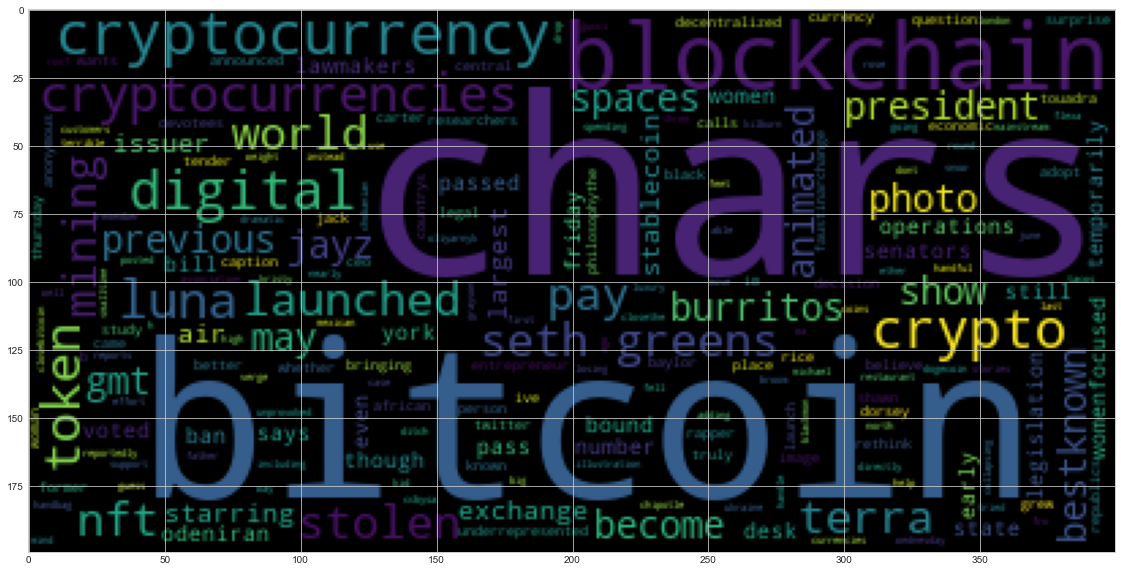

In [24]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(' '.join(btc_words))
plt.imshow(btc_wc)

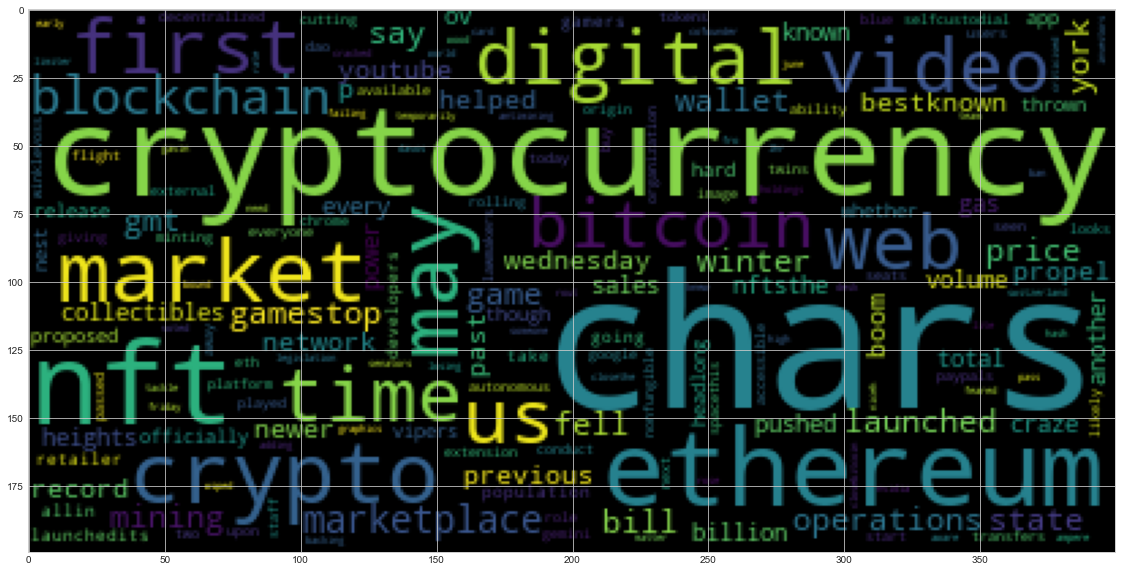

In [25]:
# Generate the Ethereum word cloud
btc_wc = WordCloud().generate(' '.join(eth_words))
plt.imshow(btc_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [30]:
# Concatenate all of the Bitcoin text together
bitcoin_text = (bitcoin_big_string)

In [31]:
# Run the NER processor on all of the text
doc_btc = nlp(bitcoin_text)

# Add a title to the document
doc_btc.user_data["NER Visualization - Bitcoin"] = "NER Visualization - Bitcoin"

In [32]:
# Render the visualization
displacy.render(doc_btc, style = 'ent')

In [33]:
# List all Entities
for ent in doc_btc.ents:
    print(ent.text)

early friday
jayz
thursday
jayz
ceo jack dorsey
nearly three feet
grayson
michael chobanian
gucci handbag round
wednesday
june
mexican
north london ago
two
today
sam


---

### Ethereum NER

In [34]:
# Concatenate all of the Ethereum text together
ethereum_text = (ethereum_big_string)

In [35]:
# Run the NER processor on all of the text
doc_eth = nlp(ethereum_text )

# Add a title to the document
doc_eth.user_data["NER Visualization - Ethereum"] = "NER Visualization - Ethereum"

In [36]:
# Render the visualization
displacy.render(doc_eth, style = 'ent')

In [37]:
# List all Entities
for ent in doc_eth.ents:
    print(ent.text)

today
two
first
early friday
switzerland
gavin wood
lhr
wednesday
june
elon musk
first
kim kardashian
nba
third
wednesday
gallon
first


---